In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

In [2]:
root_dir = './'
local_path_soil = '/bd_mir_solo_without_xy.csv'
file_path_soil = root_dir + local_path_soil

df_soil = pd.read_csv(file_path_soil)

In [3]:
df_soil.shape[0]

540

## Load train data

In [4]:
df_soil_latossolo = df_soil.where(df_soil['Ordem.SIBCS'] =='Latossolo').dropna(axis = 0)

In [5]:
df_soil_latossolo_data = df_soil_latossolo.drop(['ID_Unico','Ordem.SIBCS','Carbon_gkg'], axis=1)
df_soil_latossolo_target = pd.DataFrame(df_soil_latossolo, columns=['Carbon_gkg'])

## Load test data

In [6]:
df_soil_test = pd.read_csv('./bd_mir_solo_test_without_xy.csv')

In [7]:
df_soil_test_data = df_soil_test.drop(['ID','ID_Unico','Ordem.SIBCS','Carbon_gkg'], axis=1)
df_soil_test_target = pd.DataFrame(df_soil_test, columns=['Carbon_gkg'])

In [8]:
df_soil_test_latossolo = df_soil_test.where(df_soil_test['Ordem.SIBCS'] =='Latossolo').dropna(axis = 0)
df_soil_test_latossolo_data = df_soil_test_latossolo.drop(['ID','ID_Unico','Ordem.SIBCS','Carbon_gkg'], axis=1)
df_soil_test_latossolo_data = df_soil_test_latossolo_data.apply(lambda x:np.log(1/x))
df_soil_test_latossolo_target = pd.DataFrame(df_soil_test_latossolo, columns=['Carbon_gkg'])

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

X = pipeline.fit_transform(df_soil_test_latossolo_data)
df_soil_test_latossolo_data_tr = pd.DataFrame(X,columns=df_soil_test_latossolo_data.columns)

## Model 1

In [10]:
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np

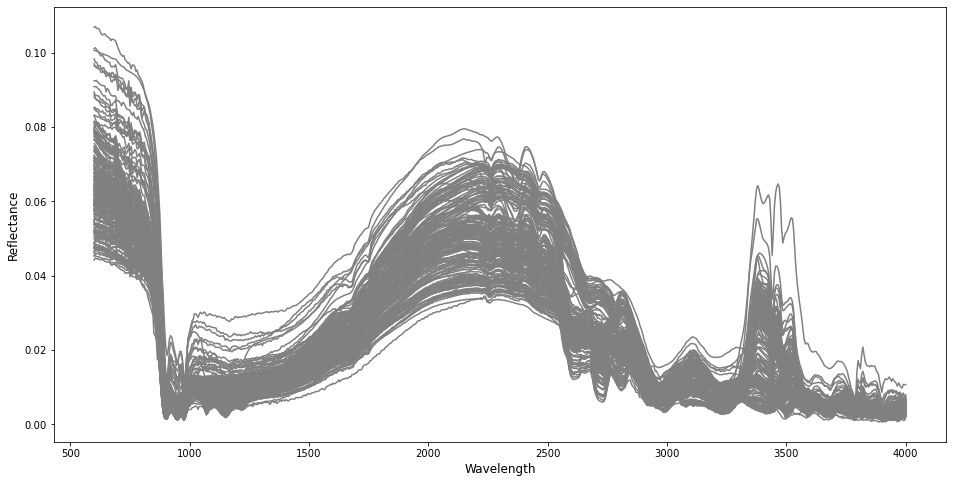

In [11]:
index_col = []
for i in range(600,4001,5):
    index_col.append(i)
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_latossolo_data)):
    
    test_row = df_soil_latossolo_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [12]:
#Converting data from reflectance values to absorbance values
from math import log, exp

In [13]:
df_soil_latossolo_data = df_soil_latossolo_data.apply(lambda x:np.log(1/x))

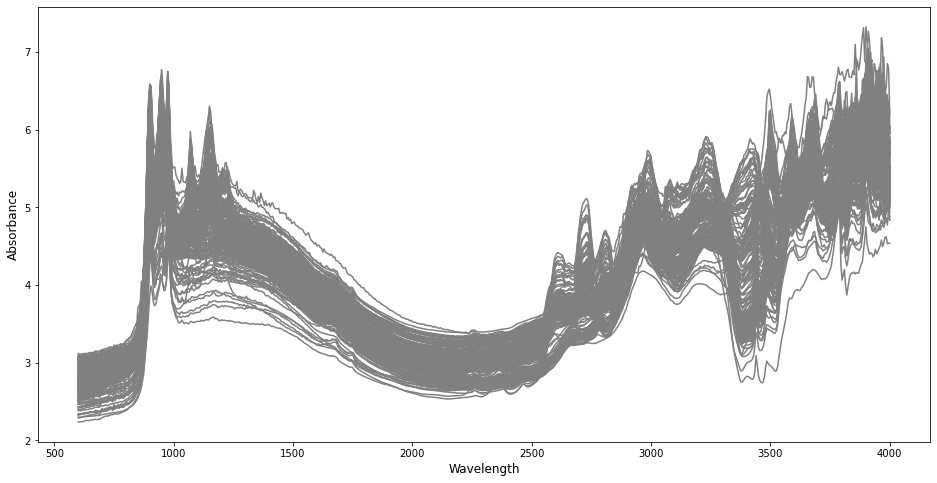

In [14]:
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_latossolo_data)):
    
    test_row = df_soil_latossolo_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Absorbance', fontsize=12)
plt.show()

In [15]:
#Savitzky-Golay Filtering
import scipy
from scipy import signal

In [17]:
v = scipy.signal.savgol_filter(df_soil_latossolo_data,21,3)
for i in range(len(df_soil_latossolo_data)):
    for j in range(len(df_soil_latossolo_data.iloc[i])):
        df_soil_latossolo_data.iloc[i][j] = v[i][j]

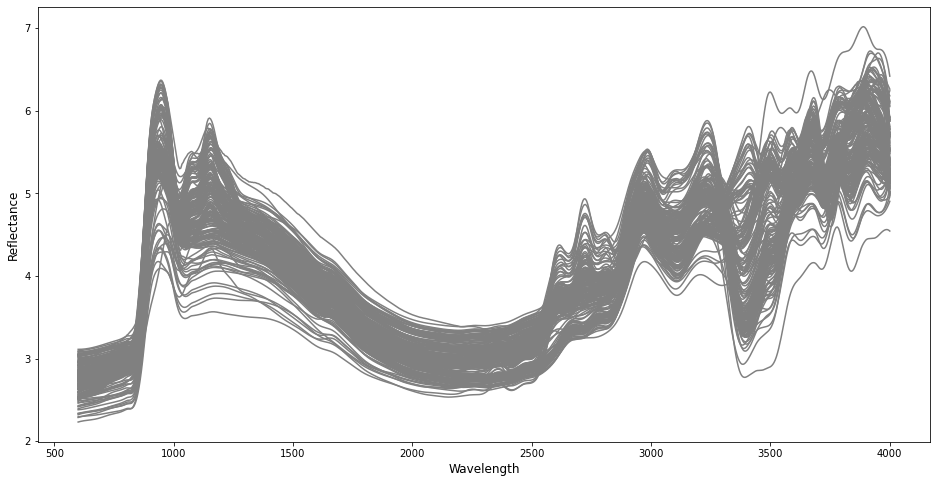

In [18]:
plt.figure(figsize = (16, 8))
for i in range(len(df_soil_latossolo_data)):
    
    test_row = df_soil_latossolo_data.iloc[i]
    plt.plot(index_col, test_row, markersize = 0.01, color='grey') 
    
plt.xlabel('Wavelength', fontsize=12)
plt.ylabel('Reflectance', fontsize=12)
plt.show()

In [19]:
# Standardizing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler',StandardScaler())
])

In [20]:
X = pipeline.fit_transform(df_soil_latossolo_data)
df_soil_latossolo_data_tr = pd.DataFrame(X,columns=df_soil_latossolo_data.columns)
df_soil_latossolo_data_tr

,4000,3995,3990,3985,3980,3975,3970,3965,3960,3955,...,645,640,635,630,625,620,615,610,605,600
0,-0.421701,-0.381506,-0.348603,-0.322483,-0.302477,-0.287794,-0.277554,-0.270815,-0.266597,-0.263893,...,1.579765,1.571530,1.575976,1.596826,1.638201,1.704420,1.799097,1.922533,2.065816,2.201591
1,-1.153930,-1.129172,-1.108977,-1.093145,-1.081324,-1.073047,-1.067760,-1.064847,-1.063649,-1.063483,...,1.561647,1.574290,1.598098,1.637678,1.698113,1.784776,1.902380,2.052154,2.225322,2.392615
2,0.600083,0.602615,0.604612,0.606184,0.607420,0.608388,0.609140,0.609713,0.610137,0.610435,...,-0.494172,-0.507024,-0.521159,-0.536864,-0.554339,-0.573485,-0.593450,-0.611719,-0.622606,-0.615914
3,-0.019140,-0.031074,-0.041118,-0.049393,-0.056056,-0.061290,-0.065299,-0.068300,-0.070520,-0.072191,...,-0.354895,-0.350096,-0.353438,-0.366783,-0.392438,-0.433237,-0.492399,-0.572697,-0.673966,-0.788042
4,1.239878,1.249900,1.258149,1.264868,1.270268,1.274527,1.277796,1.280206,1.281871,1.282898,...,0.204080,0.159431,0.116030,0.073739,0.032333,-0.008435,-0.048673,-0.087985,-0.124724,-0.154955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.514525,1.466879,1.429552,1.402187,1.384168,1.374676,1.372743,1.377296,1.387191,1.401248,...,0.778567,0.721103,0.659176,0.591091,0.514389,0.425556,0.319764,0.191012,0.033767,-0.151887
176,0.936603,0.930925,0.925981,0.921817,0.918418,0.915711,0.913580,0.911878,0.910435,0.909068,...,-0.062478,-0.083160,-0.106796,-0.135464,-0.171628,-0.218258,-0.278784,-0.356540,-0.452824,-0.562622
177,-1.241148,-1.256866,-1.269026,-1.277989,-1.284111,-1.287736,-1.289196,-1.288808,-1.286882,-1.283718,...,1.554748,1.657367,1.769505,1.889109,2.013760,2.139535,2.258760,2.355847,2.400997,2.346093
178,-0.729798,-0.701574,-0.678356,-0.659911,-0.645868,-0.635755,-0.629023,-0.625065,-0.623240,-0.622884,...,0.916771,0.972814,1.036022,1.104303,1.175298,1.245646,1.309592,1.356510,1.367386,1.313141


In [21]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
scores = []
ne = [1,100,500,800,1000,2000]
for n in ne:
    forest_reg_latossolo = RandomForestRegressor(n_estimators=n)
    score = cross_val_score(forest_reg_latossolo,df_soil_latossolo_data_tr,df_soil_latossolo_target,cv=10)
    score = score.mean()
    scores.append(score)

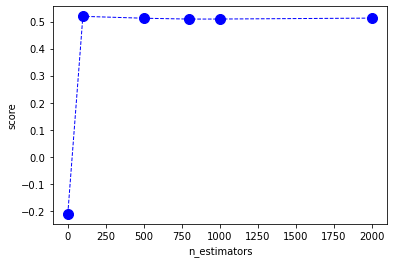

[-0.21113468142575414,
 0.5194680144641988,
 0.5124780837517356,
 0.5093366487106026,
 0.5095005134156756,
 0.5129399175799664]

In [19]:
plt.plot(ne,scores,'bo',linestyle = 'dashed', linewidth = 1, markersize = 10)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()
scores

In [20]:
forest_reg_latossolo = RandomForestRegressor(n_estimators=100)
forest_reg_latossolo.fit(df_soil_latossolo_data_tr, df_soil_latossolo_target)

<ipython-input-20-478f29208ee8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg_latossolo.fit(df_soil_latossolo_data_tr, df_soil_latossolo_target)


RandomForestRegressor()

In [22]:
import joblib
from sklearn.metrics import r2_score

In [37]:
es1 = joblib.load('./model/latossolo/forest_reg_latossolo.pkl')

In [38]:
Y = es1.predict(df_soil_test_latossolo_data_tr)
m = mean_squared_error(df_soil_test_latossolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_latossolo_target, Y)))

root_mean_squared_error: 7.2515767676420495
R2: -0.29734699138375076


D:\softwareForLearn\anaconda\inss\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<AxesSubplot:>

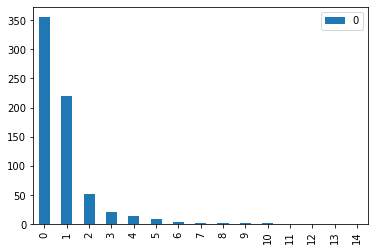

In [39]:
#PCA
df_soil_latossolo_data_tr_ = df_soil_latossolo_data_tr
ew_latossolo, ev_latossolo = np.linalg.eig(np.cov(df_soil_latossolo_data_tr_.T))
ew_latossolo_order = np.argsort(ew_latossolo)[::-1]
ew_latossolo_sort = ew_latossolo[ew_latossolo_order]
ev_latossolo_sort = ev_latossolo[:,ew_latossolo_order]
pd.DataFrame(ew_latossolo_sort[0:15]).plot(kind='bar')

In [40]:
from sklearn.decomposition import PCA
from sklearn import linear_model

In [55]:
pca_latossolo = PCA(n_components=2)
pca_latossolo.fit(df_soil_latossolo_data_tr)
df_soil_latossolo_data_tr_pca = pca_latossolo.transform(df_soil_latossolo_data_tr)

ols_latossolo = linear_model.LinearRegression()
ols_latossolo.fit(df_soil_latossolo_data_tr_pca, df_soil_latossolo_target)

LinearRegression()

In [56]:
df_soil_test_latossolo_data_tr_pca = pca_latossolo.transform(df_soil_test_latossolo_data_tr)
Y = ols_latossolo.predict(df_soil_test_latossolo_data_tr_pca)
m = mean_squared_error(df_soil_test_latossolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_latossolo_target, Y)))

root_mean_squared_error: 7.286111929197129
R2: -0.3097334771518214


In [44]:
joblib.dump(ols_latossolo, './model/latossolo/ols_latossolo.pkl')

['./model/latossolo/ols_latossolo.pkl']

In [45]:
joblib.dump(pca_latossolo, './model/latossolo/pca_latossolo.pkl')

['./model/latossolo/pca_latossolo.pkl']

In [46]:
#PLSR
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV

In [47]:
pls_model_latossolo_setup = PLSRegression(scale=True)
param_grid = {'n_components': range(1, 20)}
gsearch = GridSearchCV(pls_model_latossolo_setup, param_grid)
pls_model_latossolo = gsearch.fit(df_soil_latossolo_data_tr, df_soil_latossolo_target)

In [48]:

Y = pls_model_latossolo.predict(df_soil_test_latossolo_data_tr)
m = mean_squared_error(df_soil_test_latossolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_latossolo_target, Y)))

root_mean_squared_error: 8.772040719217632
R2: -0.8984209991192142


In [30]:
joblib.dump(pls_model_latossolo, './model/pls_model_latossolo.pkl')

['./model/pls_model_latossolo.pkl']

In [23]:
es = joblib.load('./model/total/forest_total.pkl')

In [24]:
Y = es.predict(df_soil_test_latossolo_data_tr)
m = mean_squared_error(df_soil_test_latossolo_target, Y)
print("root_mean_squared_error: "+str(np.sqrt(m)))
print("R2: "+str(r2_score(df_soil_test_latossolo_target, Y)))

root_mean_squared_error: 6.861447194550049
R2: -0.161509327953691
